## Регрессия на imdb

In [56]:
# ячейка импортов
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score


# место для импорта регрессионных моделей
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
! unzip "imdb.zip" 

Archive:  imdb.zip
  inflating: IMDB-Movie-Data.csv     


In [4]:
data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## Регрессии:

Задача: определить рейтинг по описанию фильма

Шаги выполнения: 
- Определите, какие части датасета необходимы для вашей задачи
- Если работаете с текстовыми ячейками, векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку
- Попробуйте обучить [разные регрессионные модели](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (не забудьте импортировать их в эту тетрадку)

- Для каждой модели посмотрите на метрики. 

Какая/какие модель/ли справляются с выбранной Вами задачей наиболее эффективно?

In [77]:
data = data[['Runtime (Minutes)', 'Rating']]

display(data)

,Runtime (Minutes),Rating
0,121,8.1
1,124,7.0
2,117,7.3
3,108,7.2
4,123,6.2
...,...,...
995,111,6.2
996,94,5.5
997,98,6.2
998,93,5.6


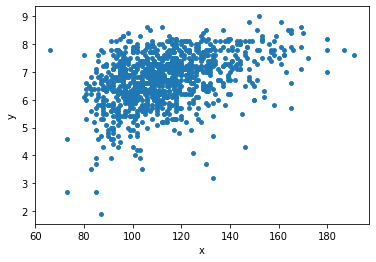

In [10]:
import matplotlib.pyplot as plt

plt.scatter(data['Runtime (Minutes)'].values,data['Rating'].values,s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

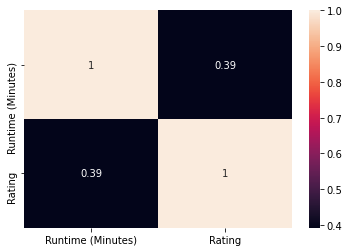

In [13]:
import seaborn as sns

cols = ['Runtime (Minutes)', 'Rating']
hm = sns.heatmap(data[cols].corr(),
                 cbar=True,
                 annot=True)

In [40]:
X = np.array([data['Runtime (Minutes)'].values]).reshape((-1, 1))
display(X, X.shape)

array([[121],
       [124],
       [117],
       [108],
       [123],
       [103],
       [128],
       [ 89],
       [141],
       [116],
       [133],
       [127],
       [133],
       [107],
       [109],
       [ 87],
       [139],
       [123],
       [118],
       [116],
       [120],
       [137],
       [108],
       [ 92],
       [120],
       [ 83],
       [159],
       [ 99],
       [100],
       [115],
       [111],
       [116],
       [144],
       [108],
       [107],
       [147],
       [169],
       [115],
       [132],
       [113],
       [ 89],
       [111],
       [ 73],
       [115],
       [ 99],
       [136],
       [132],
       [ 91],
       [122],
       [130],
       [136],
       [ 91],
       [118],
       [101],
       [152],
       [161],
       [ 88],
       [106],
       [117],
       [ 96],
       [151],
       [ 86],
       [112],
       [125],
       [130],
       [129],
       [133],
       [120],
       [106],
       [107],
       [133],
      

(1000, 1)

In [41]:
y = data['Rating'].values
display(y, y.shape)

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 6.4, 7.1, 7. , 7.5, 7.8, 7.9,
       7.7, 6.4, 6.6, 8.2, 6.7, 8.1, 8. , 6.7, 7.9, 6.7, 6.5, 5.3, 6.8,
       8.3, 4.7, 6.2, 5.9, 6.3, 7.5, 7.1, 8. , 5.6, 7.9, 8.6, 7.6, 6.9,
       7.1, 6.3, 7.5, 2.7, 7.2, 6.3, 6.7, 7.3, 5.6, 7.1, 3.7, 8.1, 5.8,
       5.6, 7.2, 9. , 7.3, 7.2, 7.4, 7. , 7.5, 6.7, 6.8, 6.5, 4.1, 8.5,
       7.7, 7.4, 8.1, 7.5, 7.2, 5.9, 7.1, 7.5, 6.8, 8.1, 7.1, 8.1, 8.3,
       7.3, 5.3, 8.8, 7.9, 8.2, 8.1, 7.2, 7. , 6.4, 7.8, 7.8, 7.4, 8.1,
       7. , 8.1, 7.1, 7.4, 7.4, 8.6, 5.8, 6.3, 8.5, 7. , 7. , 8. , 7.9,
       7.3, 7.7, 5.4, 6.3, 5.8, 7.7, 6.3, 8.1, 6.1, 7.7, 8.1, 5.8, 6.2,
       8.8, 7.2, 7.4, 6.7, 6.7, 6. , 7.4, 8.5, 7.5, 5.7, 6.6, 6.4, 8. ,
       7.3, 6. , 6.4, 8.5, 7.1, 7.3, 8.1, 7.3, 8.1, 7.1, 8. , 6.2, 7.8,
       8.2, 8.4, 8.1, 7.4, 7.6, 7.6, 6.2, 6.4, 7.2, 5.8, 7.6, 8.1, 4.7,
       7. , 7.4, 7.5, 7.9, 6. , 7. , 8. , 6.1, 8. , 5.2, 6.5, 7.3, 7.3,
       6.8, 7.9, 7.9, 5.2, 8. , 7.5, 6.5, 7.6, 7. , 7.4, 7.3, 6.

(1000,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [43]:
slr = LinearRegression()
slr.fit(X_train, y_train)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: 0.02
Intercept: 4.58


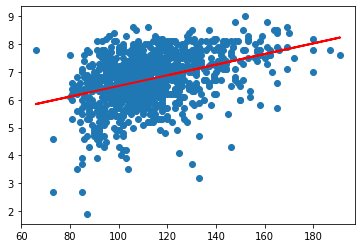

In [44]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2);

In [45]:
y_pred = slr.predict(X)

# Полиноминальная регрессия

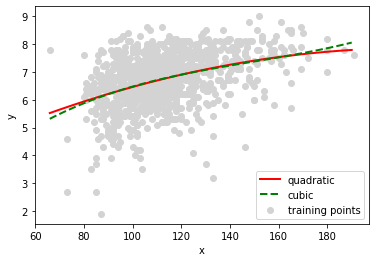

In [74]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = slr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_mae = mean_absolute_error(y, regr.predict(X_quad))
quadratic_mse = mean_squared_error(y, regr.predict(X_quad))
quadratic_rmse = mean_squared_error(y, regr.predict(X_quad))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = slr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_mae = mean_absolute_error(y, regr.predict(X_cubic))
cubic_mse = mean_squared_error(y, regr.predict(X_cubic))
cubic_rmse = mean_squared_error(y, regr.predict(X_cubic))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# график функций
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic',
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

# Результаты оценки эффективности моделей

In [81]:
# Linear Regression
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.6660663169443408
Mean Squared Error: 0.7562862688005796
Root mean squared error:  0.7562862688005796
R2 score:  0.15303964639241463


In [79]:
# Polynomial Regression (Quadratic)
print('Mean Absolute Error:', quadratic_mae)  
print('Mean Squared Error:', quadratic_mse)
print('Root mean squared error: ', quadratic_rmse)
print('R2 score: ', quadratic_r2)

Mean Absolute Error: 0.6669198529224616
Mean Squared Error: 0.752723084363454
Root mean squared error:  0.752723084363454
R2 score:  0.15703003478809852


In [80]:
# Polynomial Regression (Cubic)
print('Mean Absolute Error:', cubic_mae)  
print('Mean Squared Error:', cubic_mse)
print('Root mean squared error: ', cubic_rmse)
print('R2 score: ', cubic_r2)

Mean Absolute Error: 0.6683720043574995
Mean Squared Error: 0.7522107123216313
Root mean squared error:  0.7522107123216313
R2 score:  0.1576038370950068


# **Вывод**: 
по сравнению с моделью Linear Regression модель Polynomial Regression (Cubic) срабатывает чуть лучше и является более точной.